# Exploratory Data Analysis

by  : Andreas Chandra \
date:21/03/2021

In [2]:
import os
import glob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_path = "../datasets"

In [8]:
files = list(filter(lambda x: x.endswith('.csv'), os.listdir(data_path)))

In [9]:
d_data = pd.read_csv(os.path.join(data_path, files[0]))

In [11]:
d_data.shape

(32100, 2)

In [12]:
d_data.head()

,date,swh
0,2013-03-31 23:50:00,2.15
1,2013-04-01 00:50:00,2.18
2,2013-04-01 01:50:00,2.32
3,2013-04-01 02:50:00,2.47
4,2013-04-01 03:50:00,2.31


In [13]:
d_data.dtypes

date     object
swh     float64
dtype: object

In [16]:
d_data.date = pd.to_datetime(d_data.date)

In [28]:
# get duration of the data
print(d_data.date.min(), d_data.date.max())
print(d_data.date.max() - d_data.date.min())

2013-03-31 23:50:00 2016-12-31 22:50:00
1370 days 23:00:00


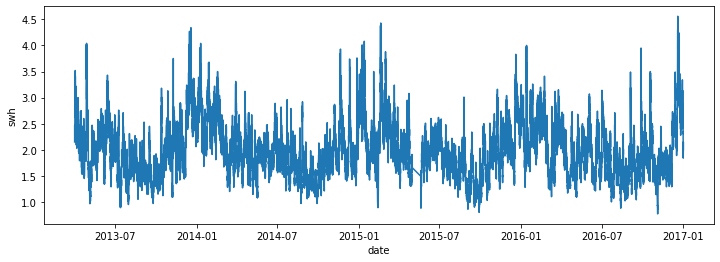

In [41]:
plt.figure(figsize=(12,4))
fig = sns.lineplot(x = 'date', y='swh', data=d_data)
fig.figure.savefig("../figures/timeframe.png")

In [62]:
d_data.groupby(d_data.date.dt.date).count()

,date,swh
date,,
2013-03-31,1,1
2013-04-01,24,24
2013-04-02,24,24
2013-04-03,24,24
2013-04-04,24,24
...,...,...
2016-12-27,24,24
2016-12-28,24,24
2016-12-29,24,24


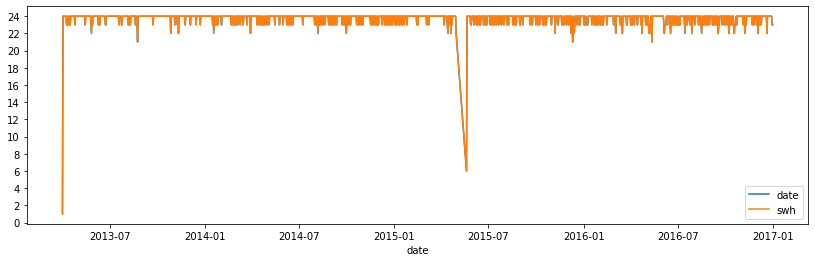

In [72]:
d_data.groupby(d_data.date.dt.date).count().plot(figsize=(14,4))
plt.yticks(list(range(0,25, 2)))
plt.savefig('../figures/data_point_per_day.png')
plt.show()

### Restructure Dataset

In [74]:
date_range = pd.date_range(d_data.date.min(), d_data.date.max(), freq='1H')

In [82]:
d_data_fulltime = pd.DataFrame(date_range, columns=['date'])

In [84]:
d_data_fulltime = d_data_fulltime.merge(d_data, how='left', on='date')

In [86]:
d_data_fulltime.isna().sum()

date      0
swh     805
dtype: int64

In [88]:
d_data_fulltime.to_csv("../data/clean/"+files[0], index=False)